[@ggruszczynski](https://github.com/ggruszczynski)

## Explicit vs Implicit scheme, eigenvalues and stability


Consider a classical problem: mass on a spring with a damper.

<img src="Mass_spring_damper.png" style="height:200px">

It can be described by a second order, homogeneus, linear differatial equation with constant coefficients:

$$ 
m \ddot{x} + c \dot{x} + kx = 0 \Leftrightarrow \\ 
%\Leftrightarrow m \ddot{x} = - c \dot{x} - kx  \\
\Leftrightarrow \ddot{x} = - \frac{c}{m} \dot{x} - \frac{k}{m} x 
$$


Rewrite it 

$$
\underbrace{
\begin{bmatrix}
\ddot{x} \\
\dot{x}
\end{bmatrix}
}_{\boldsymbol{\dot{z}}}
=
\underbrace{
\begin{bmatrix}
- \frac{c}{m} & - \frac{k}{m}\\
            1 & 0 
\end{bmatrix}
}_{\mathbb{A}}
\underbrace{
\begin{bmatrix}
\dot{x}\\
x
\end{bmatrix}
}_{\boldsymbol{z}}
$$


Introducing the variables $ z $ and $ \mathbb{A}$ we can express the equation as

$$
\boldsymbol{\dot{z}} = \mathbb{A}\boldsymbol{z}
$$

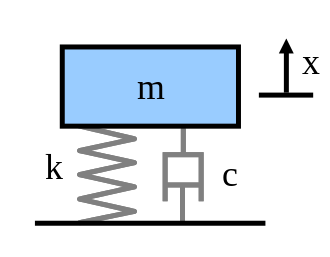

### Dictionary - Słownik

* spring and damper - sprężyna i tłumik
* second order - drugiego rzędu
* homogeneus - jednorodne
* linear differatial equation - linowe równanie różniczkowe
* with constant coefficients - ze stałymi współczninikami
* explicit - jawny
* implicit - uwikłany, niejawny
* system of equations - układ równań
* determinant of a matrix - wyznacznik macierzy
* time step - krok czasowy
* stability condition - warunek stabilności
* derivative - pochodna
* unconditionaly stable - bezwarunkowo stabilne
* frequency - częstotliwość
* eigenvalue and eigenvector of a matrix - wartość własna i wektor własny macierzy

### Some repetition

* The [determinant](https://www.youtube.com/watch?v=Ip3X9LOh2dk&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=6&ab_channel=3Blue1Brown).

* The [stability and eigenvalues](https://www.youtube.com/watch?v=h7nJ6ZL4Lf0&t=2s&ab_channel=SteveBrunton).

* The [real and complex eigenvalues](https://tutorial.math.lamar.edu/classes/de/ComplexEigenvalues.aspx).

* How to [rise e to the power of a matrix](https://www.youtube.com/watch?v=l61k97RFsfs&list=PLF4lF3MJpif70eHR2Bd-USQ3M84Cp8B_Y&index=1&t=517s&ab_channel=DrPeyamShow).



## Simple, linear ODE

Simple ODE, 
$$
\dot{z} = \lambda z
$$
where $\lambda = a \pm i b$, and $z(0)=z_0$,
has a simple solution ;)
$$
z(t) = e^{\lambda t} z_0 = e^{a t} [cos(bt) \pm i sin(bt)]  z_0 
$$

It is easy to observe, that the **continous** solution is stable if  $Re(\lambda) < 0$.



## The linear system of PDE


$$
\boldsymbol{\dot{z}} = \mathbb{A}\boldsymbol{z}
$$

One can decompose the $\mathbb{A}$ into two matrices, containing the eigevalues ($\mathbb{D}$) and eigenvectors ($\mathbb{T}$).
$$
\mathbb{A} = \mathbb{T} \mathbb{D} \mathbb{T}^{-1}
$$

Then, the analytical solution can be find as [1, chapter 8]

$$
\boldsymbol{z}(t) = e^{\mathbb{A} t} \boldsymbol{z}_0 = ... = \mathbb{T} e^{\mathbb{D} t} \mathbb{T}^{-1} \boldsymbol{z}_0
$$

where 
$$
\mathbb{D} = 
\begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2 
\end{bmatrix}
$$

and
$$
e^{\mathbb{D} t} = 
\begin{bmatrix}
e^{\lambda_1 t} & 0 \\
0 & e^{\lambda_2 t}
\end{bmatrix}
$$

Let us consider one of the eigenvalues, $\lambda = a \pm i b$,
$$
e^{\lambda t} = e^{a t} [cos(bt) \pm i sin(bt)]
$$

Again, for the **continous** system of ODE to be stable, each of the eigenvalues must be negative, $ Re(\lambda_k) < 0$

---
[1] "Data-Driven Science and Engineering", Steven L. Brunton and J. Nathan Kutz, 2019

## General formula for eigenvalues of a  matrix

The eigenvalues of a real, two-dimensional matrix

$$
\mathbb{A}= 
\begin{bmatrix}
 a & b \\
 c & d 
\end{bmatrix}
$$

are 
$$
\lambda=\frac{1}{2}(a+d) \pm \sqrt{\left(\frac{1}{2}(a-d)\right)^{2}+b c}
$$

Note that the eigenvalues are always real if b and c have the same sign, since the quantity under the radical must be positive.

<https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors>

## Eigenvalues for the continous system
For the continous system, the $\mathbb{A}$ matrix read $\mathbb{A} =
\begin{bmatrix}
- \frac{c}{m} & - \frac{k}{m}\\
            1 & 0 
\end{bmatrix}.
$
Its eigenvalues can be computed as follows,

\begin{align*}
\lambda_{anal} &=  \frac{1}{2}(-\frac{c}{m}+0) \pm \sqrt{ \left(\frac{1}{2}\left(-\frac{c}{m}-0\right)\right)^{2} -\frac{k}{m} } \\
&= -\frac{c}{2m} \pm -\frac{1}{2m} \sqrt{ c^2 -4km} \\
&= -\frac{c \pm \sqrt{ c^2 -4km}}{2m}
\end{align*}

### Questions:

- what happens if the eigenvalue is real and has positive/negative sign?
- what happens if the eigenvalue has only the imaginary component?
- what happens if the eigenvalue is complex?

## Let us check the formula for eigenvalues of continous system with sympy

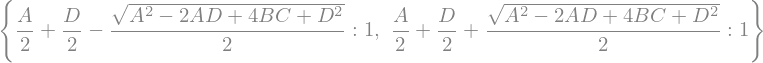

In [1]:
from sympy.solvers import solve
from sympy import Symbol, symbols, Matrix, simplify
from sympy.utilities.lambdify import lambdify
from sympy import init_printing


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

init_printing()

dt_sym = Symbol('dt', real=True, positive=True)
c_sym = Symbol('c', real=True, positive=True)
k_sym = Symbol('k', real=True, positive=True)
m_sym = Symbol('m', real=True, positive=True)

A_sym = Matrix([[-c_sym/m_sym, -k_sym/m_sym], [1, 0]])


a00, a10, a01, a11 = symbols('A B C D')
A_sym_general = Matrix([[a00, a10], [a01, a11]])
general_eigenvalues = A_sym_general.eigenvals()
general_eigenvalues

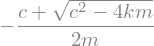

In [2]:
simplify(list(A_sym.eigenvals().keys())[0])

# alternative way of doing the same
#list(general_eigenvalues.keys())[0].subs([(a00, -c_sym/m_sym), (a10, -k_sym/m_sym), (a01, 1), (a11, 0)])

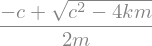

In [3]:
simplify(list(A_sym.eigenvals().keys())[1])

## Energy of the system 

The total Energy of the system can be written as

$$
E_{tot} = E_{pot} + E_{kin} = \frac{1}{2}kx^2 + \frac{1}{2}m \dot{x}^2 
$$

In case of zero dumping, it shall be constant. Check it for each scheme.

## Explicit Scheme


$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A}\boldsymbol{z}_{t}
\Leftrightarrow
$$


$$
\Leftrightarrow
\boldsymbol{z}_{t+1} = 
\underbrace{(\mathbb{1} + \Delta t \mathbb{A})}_{\mathbb{M}_E}\boldsymbol{z}_t
$$

In each step the result is multiplied by $ \mathbb{M}_E
=
\begin{bmatrix}
1 - \Delta t \frac{c}{m} & - \Delta t \frac{k}{m}\\
                \Delta t & 1
\end{bmatrix}$.

At the $k-th$ time step, $\boldsymbol{z}_k = (\mathbb{M}_E)^k \boldsymbol{z}_0$.

Notice, that each of the dicrete 'modes' is governed by $(e^{\lambda t})^k$.

This leads to the conclusion, that the solution of a **discrete** system is asymptotically stable if all the eigenvalues of $\mathbb{M}_E$ have a modulus smaller than one, $|\lambda| < 1 $.


## Eigenvalues for the explicit scheme


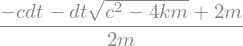

In [4]:
# using sympy
M_explicit_sym =  Matrix([[1, 0], [0, 1]]) +  dt_sym*A_sym
M_explicit_eigenvalues = M_explicit_sym.eigenvals()
simplify(list(M_explicit_eigenvalues.keys())[0])  # there are two eigenvalues: check [0] and [1]

one can simplify further using hand and pencil ;)

\begin{align*}
\lambda_{E} &=  \frac{1}{2}\left(2-\frac{c}{m}\right) \pm \sqrt{ \left(\frac{1}{2}\left(-\frac{\Delta t c}{m}\right)\right)^{2} -\frac{(\Delta t)^2k}{m} } \\
&= 1 -\frac{\Delta t c}{2m} \pm -\frac{\Delta t}{2m} \sqrt{ c^2 - 4km} \\
&= 1 - \frac{\Delta t }{2m} \left(c \pm  \sqrt{ c^2 - 4km}\right)
\end{align*}

In [5]:
# properties of the system
m = 1           # mass
c = 0*1e-2        # damping coefficient
k = 1e-0        # stiffnes of the spring

In [6]:
explicit_eigenvalue = list(M_explicit_eigenvalues.keys())[0].subs([(m_sym, m), (k_sym, k), (c_sym, c)])
explicit_eigenvalue = simplify(abs(explicit_eigenvalue))
explicit_eigenvalue

In [7]:
def plot_lambda(x,y, xlim, ylim):
    plt.clf() # Used to clear the current Figure’s state without closing it.
    plt.close()
    plt.plot(x,y)
    fig = mpl.pyplot.gcf()
    fig.set_size_inches(8,6)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.5f}'))

    plt.title(r'$|\lambda(dt)|$')
    plt.xlabel('dt')
    plt.ylabel(r'$|\lambda|$')
    plt.xlim(xlim)
    plt.ylim(ylim)
    # # plt.yscale('log')

    plt.grid()
    plt.show()
   


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
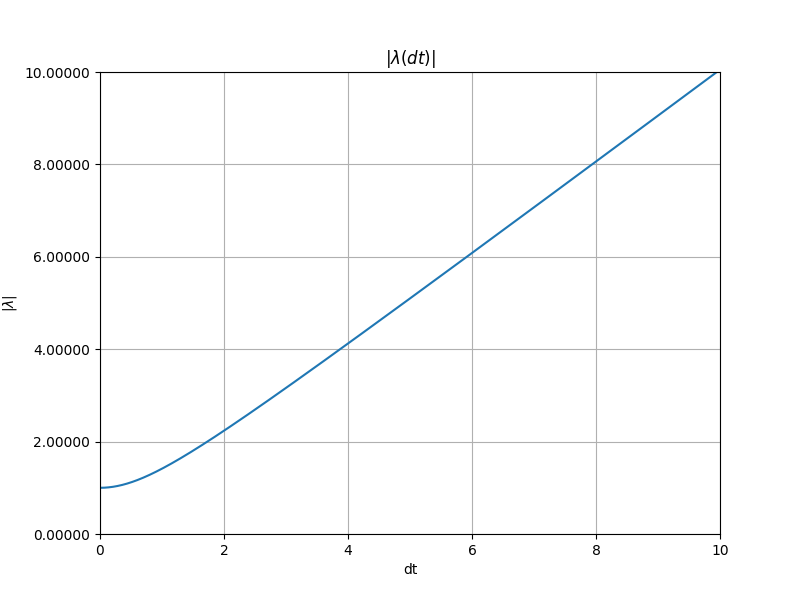

In [23]:
# https://docs.sympy.org/latest/modules/numeric-computation.html
f_ee = lambdify(dt_sym, explicit_eigenvalue, "numpy")
x_ee = np.linspace(0, 10, 1000000)
y_ee = f_ee(x_ee)

# plot_lambda(x_ee, y_ee, xlim=[0, 0.015], ylim=[0.99998,1.00001])
plot_lambda(x_ee,y_ee, xlim=[0,10], ylim=[0,10])  # see full scale

In [9]:
def make_plots(states,time,m,k):
    plt.clf() # Used to clear the current Figure’s state without closing it.
    plt.close()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('Mass on a spring with damper')

    ax1.plot(time, states[:,0], linestyle="-", color="green", label='x')
    ax1.plot(time, states[:,1], linestyle="-", color="blue", label=r"$\dot{x}$")
    ax1.set(xlabel='time', ylabel=r'$x, \dot{x}$')
    ax1.set_title(r'$x(t), \dot{x}(t)$')
    ax1.legend(["x",r"$\dot{x}$"],loc="upper right") 
    ax1.grid(which='both')

    ax2.plot(states[:,0], states[:,1], color="red")
    ax2.plot(states[0,0], states[0,1], marker='x', color='black', markersize=8)
    ax2.set(xlabel='x', ylabel=r"$\dot{x}$")
    ax2.set_title(r'trajectory: $\dot{x}$(x)')
    ax2.grid(which='both')

    E_pot = 0.5 * k* states[:,1]**2
    E_kin = 0.5 * m* states[:,0]**2
    E_total = E_kin + E_pot

    ax3.plot(time, E_kin, label='E_{kinetic}', linestyle="-",color="green")
    ax3.plot(time, E_pot, label='E_{potential}', linestyle="-", color="blue")
    ax3.plot(time, E_total, label='E_{total}',marker='', linestyle=":", linewidth=2, color="red",  markevery=int(len(E_total)/75) )
    ax3.set(xlabel='time', ylabel='E')
    ax3.set_title('Energy(t)')
    ax3.legend([r"$E_{kinetic}$",r"$E_{potential}$",r"$E_{total}$"],loc="upper right")
    ax3.grid(which='both')
    # ax3.set_yscale('log')

    plt.show()

In [10]:
# time step - solver settings
T_end = 20              # [s] time to be simulated 
N = int(1e3)            # number of time steps
dt = T_end/N            # time step length
time = dt*np.arange(N)
IC = np.array([1,0])    # IC [position,speed]

dt: 0.02
eigenvalues of M_explicit: [1.+0.02j 1.-0.02j]
modulus of the eigenvalues of M_explicit: [1.00019998 1.00019998]
eigenvectors of M_explicit: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
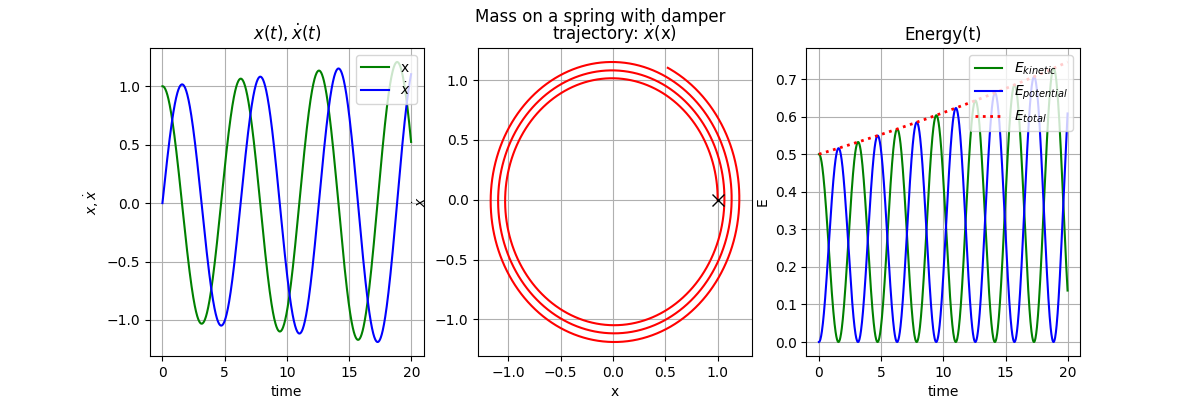

In [24]:
# prepare data for computations

all_states_explicit = np.zeros([N,2])
all_states_explicit[0] = IC

A = np.array([
    [-c/m, -k/m],
    [1,    0]])

M_explicit = np.eye(2) + dt*A

w_explicit, v_explicit = np.linalg.eig(M_explicit)  # calculate the eigenvalues and eigenvectors

print(f"dt: {dt}")
print(f"eigenvalues of M_explicit: {w_explicit}")
print(f"modulus of the eigenvalues of M_explicit: {np.abs(w_explicit)}")
print(f"eigenvectors of M_explicit: \n {v_explicit}")

# compute
for i in range(0,N-1):
    all_states_explicit[i+1] =  M_explicit @ all_states_explicit[i]

make_plots(all_states_explicit, time,m,k)


# Impilicit Scheme

In the implicit scheme, the derivative $\boldsymbol{\dot{z}}_{t+1}$ is taken from the future.


$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A}\boldsymbol{z}_{t+1}
\Leftrightarrow
$$


$$
\Leftrightarrow \boldsymbol{z}_{t+1} = \underbrace{(\mathbb{1}  - \Delta t \mathbb{A} )^{-1}}_{\mathbb{M}_I} \boldsymbol{z}_t
$$

To calculate next iteration, a system of equations, $(\mathbb{1}  - \Delta t \mathbb{A} )^{-1}$, has to be solved.

Let us calculate the eigenvalues of $(\mathbb{M}_I)^{-1}$,

$$
\mathbb{M}_I 
= 
\begin{bmatrix}
1 + \Delta t \frac{c}{m} &  \Delta t \frac{k}{m}\\
               -\Delta t & 1 
\end{bmatrix}
^{-1}
$$

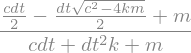

In [12]:
M_implicit_sym =  Matrix([[1, 0], [0, 1]]) -  dt_sym*A_sym
M_implicit_sym = M_implicit_sym.inv()
M_implicit_eigenvalues = M_implicit_sym.eigenvals()
simplify(list(M_implicit_eigenvalues.keys())[0])  # there are two eigenvalues: check [0] and [1]

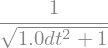

In [13]:
implicit_eigenvalue = list(M_implicit_eigenvalues.keys())[0].subs([(m_sym, m), (k_sym, k), (c_sym, c)])
implicit_eigenvalue =simplify(abs(implicit_eigenvalue))
implicit_eigenvalue

Notice that the expression above is always < 1.
This means, that the implicit scheme is unconditionaly stable.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
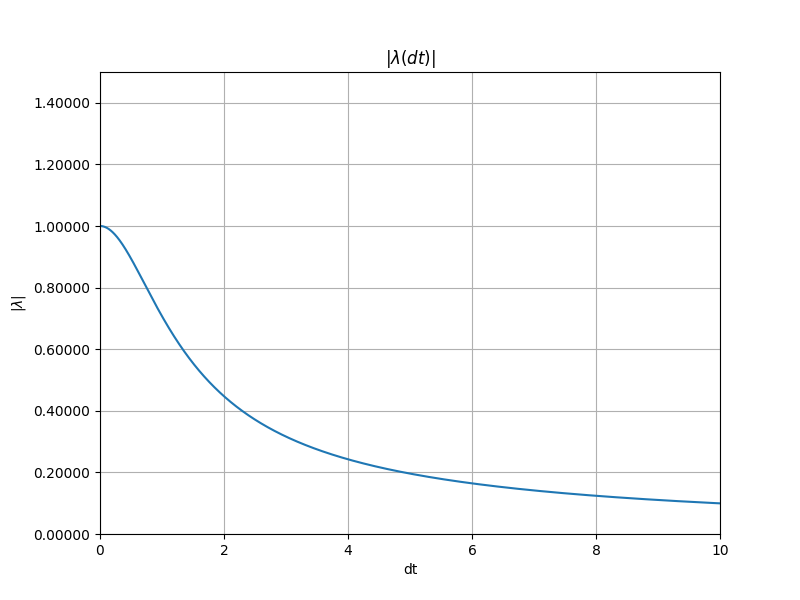

In [25]:
f_ie = lambdify(dt_sym, implicit_eigenvalue, "numpy")
x_ie = np.linspace(0, 10, 100000)
y_ie=f_ie(x_ie)
plot_lambda(x_ie,y_ie, xlim=[0, 10], ylim=[0.0,1.5])

eigenvalues of M_implicit: [0.99960016+0.019992j 0.99960016-0.019992j]
modulus of the eigenvalues of M_implicit: [0.99980006 0.99980006]
eigenvectors of M_implicit: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
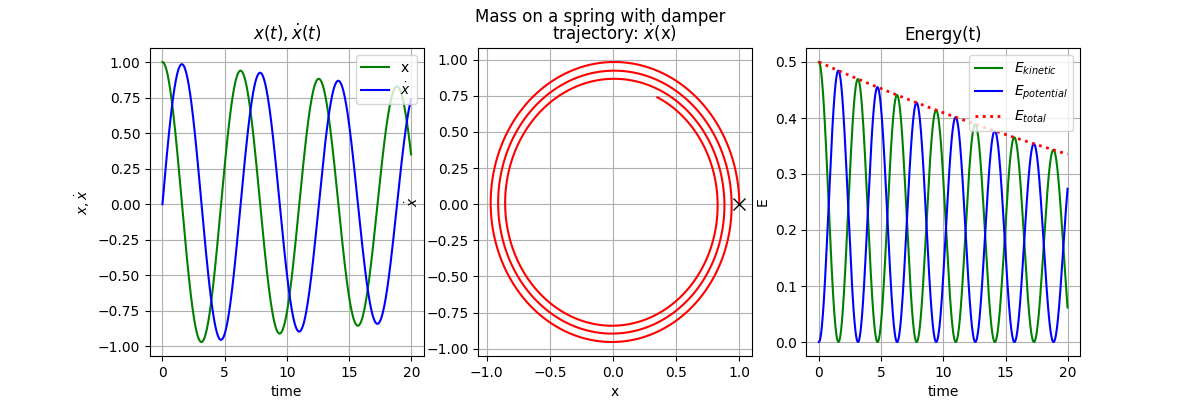

In [26]:
M_implicit = np.linalg.inv(np.eye(2) - dt*A)

# print(f"determinant M_implicit: {np.linalg.det(M_implicit)}") 
w_implicit, v_implicit = np.linalg.eig(M_implicit)  # calculate the eigenvalues and eigenvectors

print(f"eigenvalues of M_implicit: {w_implicit}")
print(f"modulus of the eigenvalues of M_implicit: {np.abs(w_implicit)}")
print(f"eigenvectors of M_implicit: \n {v_implicit}")

all_states_implicit = np.zeros([N,2])
all_states_implicit[0] = IC

for i in range(0,N-1):
    all_states_implicit[i+1] = M_implicit @ all_states_implicit[i]

make_plots(all_states_implicit, time,m,k)

# Midpoint Scheme

In the midpoint scheme, the derivative of $\dot{\boldsymbol{z}}$ is expressed as an average of current and future state.
$$
\frac{\boldsymbol{z}_{t+1}-\boldsymbol{z}_{t}}{\Delta t} = \mathbb{A} \frac{\boldsymbol{z}_{t+1}+\boldsymbol{z}_{t}}{2}
\Leftrightarrow
$$


$$
\Leftrightarrow 
\left(\mathbb{1} - \frac{\Delta t}{2} \mathbb{A} \right) 
\boldsymbol{z}_{t+1} 
= 
\left(\mathbb{1} + \frac{\Delta t}{2} \mathbb{A} \right) 
\boldsymbol{z}_t 
$$

$$
\Leftrightarrow \boldsymbol{z}_{t+1} 
= 
\underbrace{\left(\mathbb{1} - \frac{\Delta t}{2} \mathbb{A} \right)^{-1}}_{\mathbb{M}_{Mid_I}}
\underbrace{\left(\mathbb{1} + \frac{\Delta t}{2} \mathbb{A} \right)}_{\mathbb{M}_{Mid_{II}}} 
\boldsymbol{z}_t 
$$


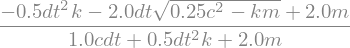

In [16]:
M_midpoint_sym_partI = Matrix([[1, 0], [0, 1]]) -  0.5*dt_sym*A_sym
M_midpoint_sym_partII = Matrix([[1, 0], [0, 1]]) +  0.5*dt_sym*A_sym
M_midpoint_sym = M_midpoint_sym_partI.inv()@M_midpoint_sym_partII
M_midpoint_eigenvalues = M_midpoint_sym.eigenvals()
simplify(list(M_midpoint_eigenvalues.keys())[0])  # there are two eigenvalues: check [0] and [1]

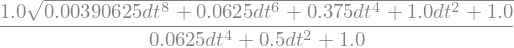

In [17]:
midpoint_eigenvalue = list(M_midpoint_eigenvalues.keys())[0].subs([(m_sym, m), (k_sym, k), (c_sym, c)])
midpoint_eigenvalue =simplify(abs(midpoint_eigenvalue))
midpoint_eigenvalue

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
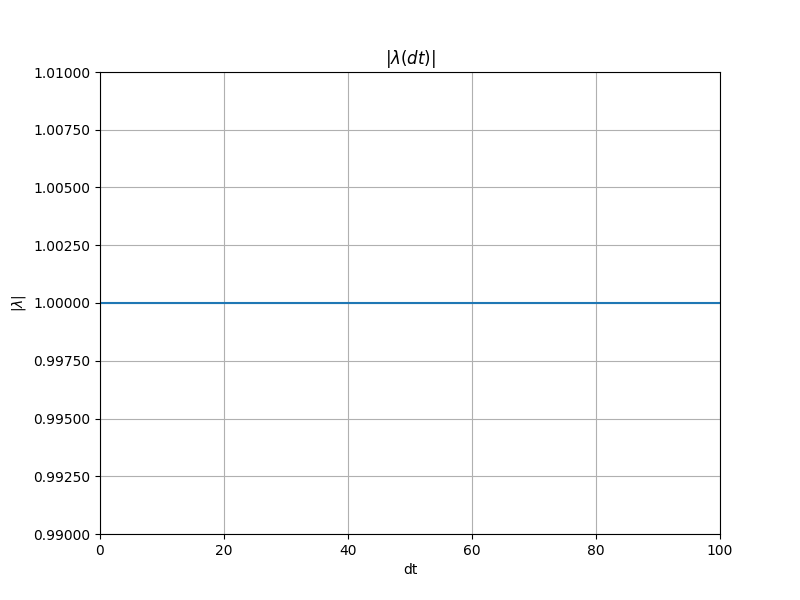

In [27]:
f_me = lambdify(dt_sym, midpoint_eigenvalue, "numpy")
x_me = np.linspace(0, 100, 100000)
y_me=f_me(x_me)
plot_lambda(x_me,y_me, xlim=[0, 100], ylim=[0.99,1.01])

eigenvalues of M_midpoint: [0.99980002+0.019998j 0.99980002-0.019998j]
modulus of the eigenvalues of M_midpoint: [1. 1.]
eigenvectors of M_midpoint: 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
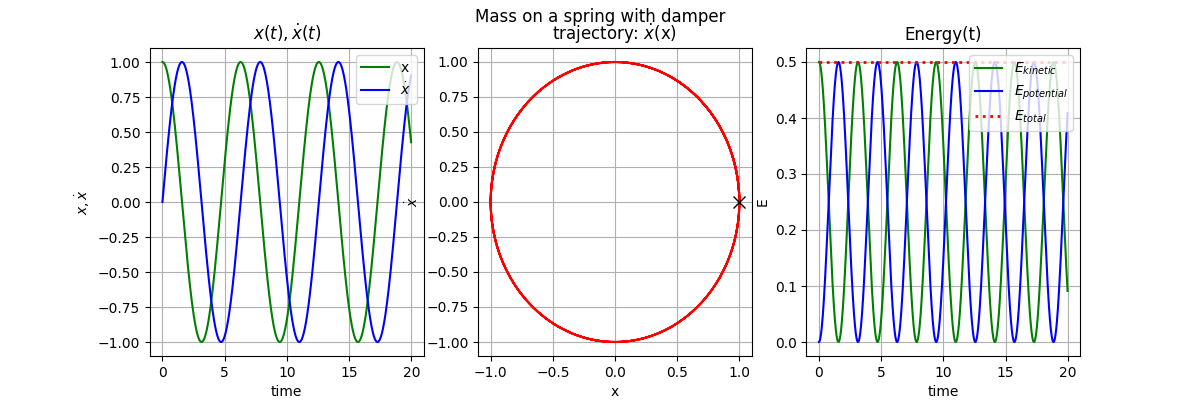

In [28]:
M_midpoint_partI = np.linalg.inv(np.eye(2) - 0.5*dt*A)
M_midpoint_partII = np.eye(2) + 0.5*dt*A
M_midpoint = M_midpoint_partI @ M_midpoint_partII

# print(f"determinant M_midpoint: {np.linalg.det(M_midpoint)}")
w_midpoint, v_midpoint = np.linalg.eig(M_midpoint)  # calculate the eigenvalues and eigenvectors

print(f"eigenvalues of M_midpoint: {w_midpoint}")
print(f"modulus of the eigenvalues of M_midpoint: {np.abs(w_midpoint)}")
print(f"eigenvectors of M_midpoint: \n {v_midpoint}")


all_states_midpoint = np.zeros([N,2])
all_states_midpoint[0] = IC

for i in range(0,N-1):
    all_states_midpoint[i+1] = M_midpoint @ all_states_midpoint[i]

make_plots(all_states_midpoint, time, m, k)

# Frequency of oscillations

Let us analyze the analitical solution of the oscilator.

$$ 
m \ddot{x} + c \dot{x} + kx = 0 
$$

Assuming a solution of form $x(t)= e^{rt}$, the derivatives reads $ \dot{x} = r e^{rt}$ and $\ddot{x} = r^2 e^{rt}$.

After pluging in and dividing by $ e^{rt}$, the characteristic equation appears as:

$$ 
m r^2 + c r + k = 0 
$$


when $ c^2 -4mk < 0 $ the general solution is known as[<sup>1</sup>](#fn1) 


$$ 
x(t) = e^{\alpha t} \left[A cos(\omega t) + B sin(\omega t) \right] =  C e^{\alpha t}  cos(\omega t - \phi_0)
$$

where

$$
\alpha = - \frac{c}{2m} \hspace{2em} and \hspace{2em} \omega=\frac{\sqrt{4mk - c^2}}{2m}
$$


Conclusions

* The frequency of oscillations, $ \omega $ are **always decreasing** due to the damping $ c $.

* Observe the existence of the **numerical dumping** (aka numerical viscosity) in the implicit scheme.

* Run the case with $c=0$ and check!

* When $ c^2 -4mk \geq 0 $ then there are no oscilations.

## Conservation of the system's energy

In case of no dumping $\omega=\sqrt{k/m}$.
For simplicity, assume $\phi_0=0$ then,

$$
x = C cos(\omega t) \\
\dot{x} = - C sin(\omega t) 
$$



It is easy to show that the total energy is conserved:

$$
E_{total}  = \frac{1}{2}kx^2 + \frac{1}{2}m \dot{x}^2  
= \frac{C}{2} \left[ m \omega^2 sin^2(\omega t) + k cos^2(\omega t)   \right] = \frac{kC}{2}
$$

Remember that $1 = cos^2(\omega t) + sin^2(\omega t)$.

---
<span id="fn1"> "Analiza matematyczna w zadaniach, część II", W. Krysicki, L. Włodarski., 1974, Rozdział XIII, str. 288-289.</span>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
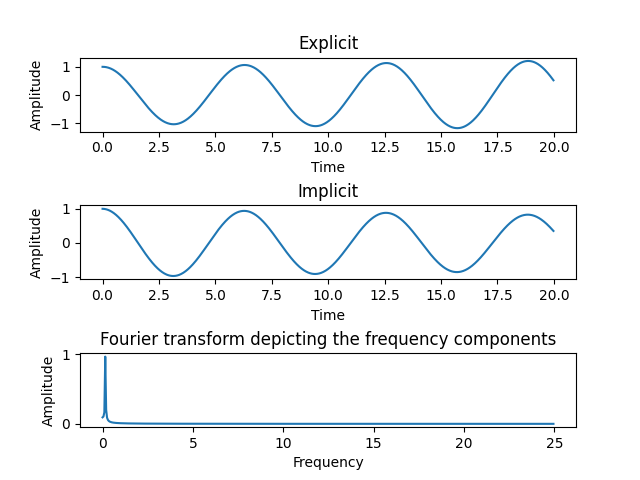

beta_damped = 1.5915e-01 [Hz] 	 beta_undamped = 1.5915e-01 [Hz]
frequency peak at = 1.5000e-01 [Hz]


In [20]:
# Frequency domain representation
# inspired by:
# https://pythontic.com/visualization/signals/fouriertransform_fft

# Add the waves
amplitude = all_states_implicit[:,0] + all_states_explicit[:,0]
# amplitude = all_states_implicit[:,0]
# amplitude = all_states_explicit[:,0]

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

samplingFrequency = 1./dt

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod


# Frequency domain representation
# Create subplot

figure, axis = plt.subplots(3, 1)
plt.subplots_adjust(hspace=1)
# Time domain representation for  wave 1
axis[0].set_title('Explicit')
axis[0].plot(time, all_states_explicit[:,0])
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for wave 2
axis[1].set_title('Implicit')
axis[1].plot(time, all_states_implicit[:,0])
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Frequency domain representation
axis[2].set_title('Fourier transform depicting the frequency components')
axis[2].plot(frequencies, abs(fourierTransform))
axis[2].set_xlabel('Frequency')
axis[2].set_ylabel('Amplitude')
plt.show()

##
beta_undamped = np.sqrt(4*m*k)/(2*m) # [rad/s]
beta_damped = np.sqrt(4*m*k-c*c)/(2*m) # [rad/s]

print(f"beta_damped = {beta_damped/(2*np.pi):.4e} [Hz] \t beta_undamped = {beta_undamped/(2*np.pi):.4e} [Hz]")
print(f"frequency peak at = {frequencies[int(np.argmax(abs(fourierTransform)))]:.4e} [Hz]")


In [21]:
print(k,m,c)
print(f"w undamped = {np.sqrt(k/m)/(2*np.pi)}")

1.0 1 0.0
w undamped = 0.15915494309189535


# Questions:

* What is the general difference between the implicit, explicit and midpoint scheme in terms of stability?
* Consider the numerical integration rules, such as rectangle and trapezoidal rule. How do they compare to the Euler's implicit/explicit scheme and the midpoint scheme?
* What is the numerical condition for the stability of the scheme?
* In the implicit and midpoint scheme the inverse of the matrix have been calculated... but only once.
Which kind of problems (think of the $k$ and $c$) coefficient would require to invert the matrix in each time step?
* Which schemes allows you to make longer time steps?
* What is the geometrical interpretation of the determinant?

## Answers:

* The implicit scheme, contrary to the explicit one is unconditionally stable. The midpoint scheme is energy conserving.
* The Euler's scheme corresponds to the rectangular one. The midpoint scheme can be viewed as rectangular one with value take in the middle of the step.

Midpoint scheme to odpowiednik (ale nie to samo!) całkowania metodą prostokątów dla przybliżenia górnego boku prostokąta wartością funkcji w środku przedziału kroku całkowania. 
Implicit podobnie, tylko dla prawego wierzchołkaprostokąta, tj. branie przybliżenia z przyszłości. Explicit - dla lewego wierzchołka, tj. branie przybliżenia zpoprzedniego kroku. Metoda trapezów = 0.5(lewy+prawy)

(Nie)jawność metody to kwestia brania wartości z przy/przeszłości do obliczania pochodnej. 
Rząd metody (Euler=prostokąty, zbieżność pierwszego rzędu), trapez (funkcja liniowa, drugiego rzędu), midpoint (wartość brana ze środka przedziału, drugi rząd), Simpson (funkcja kwadratowa) wynika z ilości punktów które bierzemy do obliczania pochodnej.
Warunek stabilności dla dyskretnego.
Schemat numeryczny jest asymptotycznie stabilny jeśli wszystkie wartości własne macierze transformacji, $\mathbb{M}$, maja moduł mniejszy niż, $|\lambda| < 1$. W przeciwnym wypadku schemat jest rozbieżny.
Przykładowo, schemat Eulera może być sformułowany w sposób jawny lub niejawny. Schemat niejawny Eulera jest bezwarunkowo stabilny.

https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/2%3A_Techniques_of_Integration/2.5%3A_Numerical_Integration_-_Midpoint%2C_Trapezoid%2C_Simpson's_rule

Konieczność odwracania macierzy w każdej iteracji zachodzi gdy c,k nie są stałymi. 
Np 
k=k(przemiesczenie) - nieliniowa sprężyna. Nie znam sprężyn ktorych sprężysość zależałaby od czasu (pomijamy rdzewienie ;) ).
c=c(predkosc) - tłumik z płynem nie Newton'owskim (lepkość zależna od tempa ścinania w płynie). Możnaby sobie wyobrazić jeszcze płyn który zastyga, więc c=c(t), ale skala czasowa tego zjawiska jest zwykle zdecydowanie dłuższa niż okres drgań.


* The solution of a **discrete** system is asymptotically stable if all the eigenvalues of the trasformation matrix, $\mathbb{M}$, have a modulus smaller than one, $|\lambda| < 1$. Otherwise **numerical** scheme will be divergent.
* In nonlinear, implicit problems, $k=k(x)$, the inverse of the matrix must be calculated in each iteration.
* As the implicit scheme is unconditionally stable, a longer time step can be taken.
* Value of the determinant describes volume of the body created by vectors corresponding to either rows or columns of the matrix (notice that $ det(\mathbb{A}^T) = det(\mathbb{A})$.